# ADMN5006 - Analytics for Financial Markets

## Assignment #1

<p>Your assignment is to design and develop machine learning models for corporate bankruptcy prediction 2 years into the future using the data provided. </p>
   - The column “BK” in the data provided denotes whether the company goes bankrupt (indicated by 1) 2 years in the future, or not (indicated by 0). 
   - Some of the input variables included are “Assets Growth”, “Sales Growth”, “Earnings-per-share (EPS)”, “Return-on-equity (ROE)”, etc. 
   - In addition, the paper entitled: “Machine learning models and bankruptcy prediction” by Barboza et. al. is posted to the portal and is an excellent reference for you to use.  
    
<p>Note however that the dataset you are given is not the same as the one used in the aforementioned paper.  Therefore, don’t be alarmed if your results don’t agree with the Barboza et. al. paper.  You will need to partition your data into testing and training sets and explain your experimental set-up.</p>

<p>The input and output variables are described below:</p>

- EPS – Earnings Per Share
- Liquidity – Working Capital/Total Assets
- Profitability – Retained Earnings/Total Assets
- Productivity – EBIT/Total Assets
- Leverage Ratio – (Total Long-term debt + Debt in Current liabilities)/Stockholders Equity
- Asset Turnover – Sales/ Total Assets
- Operational Margin – EBIT/Sales
- Market Book Ratio – (Price Close Annual Fiscal * Common Shares Outstanding)/Book Value Per Share
- Asset Growth – Change in assets from previous year
- Sales Growth – Change in sales from previous year
- Employee Growth – Change in employees from previous year
- Tobin’s Q – (Total market value of company + liabilities)/ (Total asset or book value + liabilities)
- BK – Company bankrupt or not


    

## 1. Stage One

### 1.1 Inventory resources
    - Personnel: Luke, Jad, Rita, Sreehari, Arnab, Varun
    - Data: Banruptcy_data_Final
    - Computing resources:  Machine Learning (Random Forest, SVM, Naive Bayes)
    - Software: Jupyter Notebook

## 2. Stage Two

### 2.1 Initial Data Report

In [1]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
#Data source: 
#Source Query location: 
path =  'Bankruptcy_data_Final.xlsx'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
#df =  pd.read_csv(path, sep=',')
df = pd.read_excel(path)

### 2.2 Describe Data

In [3]:
df. columns

Index(['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth',
       'BK'],
      dtype='object')

In [4]:
df.shape

(92872, 13)

In [5]:
df.dtypes

EPS                   float64
Liquidity             float64
Profitability         float64
Productivity          float64
Leverage Ratio        float64
Asset Turnover        float64
Operational Margin    float64
Return on Equity      float64
Market Book Ratio     float64
Assets Growth         float64
Sales Growth          float64
Employee Growth       float64
BK                      int64
dtype: object

In [6]:
df.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [8]:
df.head(5)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


### 2.3 Check Data Validity

#### 2.3.1 Check Missing Data

In [10]:
df.isnull().sum()

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [16]:
def missing_values_table(df):
    #Code Description: Attempt to show the missing values in the table
    #Input: Dataframe
    #Output: missing value table rendered columns
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [15]:
missing_values_table(df)

Your selected dataframe has 13 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Employee Growth,7010,7.5
Assets Growth,6701,7.2
Sales Growth,6701,7.2
Operational Margin,5557,6.0
Liquidity,247,0.3
Profitability,247,0.3
Productivity,247,0.3
Asset Turnover,247,0.3
Market Book Ratio,57,0.1
Leverage Ratio,26,0.0


In [17]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 13 columns.
There are 12 columns that have missing values.
We will remove 0 columns.


##### No need to drop columns in the Dataframe

#### 2.3.2 Check Outliers and remove them

In [19]:
# Task: Check for Outliers per Column and determine what to do with it.
# check: https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm 
# for more information
#    Below the first quartile − 3 ∗ interquartile range
#    Above the third quartile + 3 ∗ interquartile range

## 2.4 Initial Data Exploration

### 2.41 Distributions

In [20]:
def count_values_table(df):
        count_val = df.value_counts()
        count_val_percent = 100 * df.value_counts() / len(df)
        count_val_table = pd.concat([count_val, count_val_percent.round(1)], axis=1)
        count_val_table_ren_columns = count_val_table.rename(
        columns = {0 : 'Count Values', 1 : '% of Total Values'})
        return count_val_table_ren_columns

In [21]:
# Histogram
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries');
        plt.title('Distribution of '+col);

,Liquidity,Liquidity
0.000000,1699,1.8
0.020000,1638,1.8
0.010000,1592,1.7
0.040000,1485,1.6
-0.010000,1482,1.6
...,...,...
-0.193028,1,0.0
0.181079,1,0.0
0.158049,1,0.0
0.638783,1,0.0


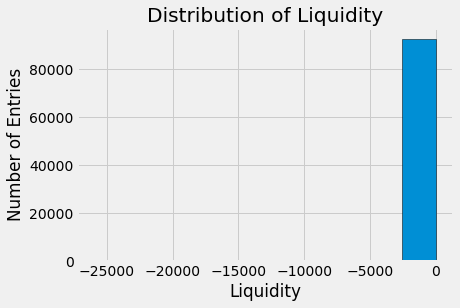

In [24]:
# This is just an Example
col = 'Liquidity'
# Histogram & Results
hist_chart(df, col)
count_values_table(df.Liquidity)

### 2.4.2 Correlations

#### Differencing

## 2.5 Data Quality Report

    -List the results of the data quality verification. If quality problems exist, suggest possible solutions. Solutions to data quality problems generally depend heavily on both data and business knowledge.

# Stage 3 - Data Preperation

In [ ]:
# Initialize variables for Data inclusion/exclusion

## 3.2 Clean The Data

### 3.2.1 Label Encoding

In [25]:
# Turn Categorical Values to Integer 
# help? : http://pbpython.com/categorical-encoding.html

### 3.2.2 Drop Unnecessary Columns

In [26]:
# This is the code for deleting columns
# del_col_list = ['col1', 'col2']

# df = df.drop(del_col_list, axis=1)
# df.head()

### 3.2.3 Altering Data Types

In [ ]:
#df['date'] = pd.to_datetime(df['date'])

###  3.2.4 Dealing With Zeros

In [ ]:
#cols = ['col1', 'col2']
#df[cols] = df[cols].replace(0, np.nan)

In [ ]:
# dropping all the rows with na in the columns mentioned above in the list.

# df.dropna(subset=cols, inplace=True)

### 3.2.5 Dealing With Duplications

In [ ]:
#df = df.drop_duplicates(keep='first')

## 3.3 Construct Required Data

This task includes constructive data preparation operations such as the production of derived attributes or entire new records, or transformed values for existing attributes.

- Derived attributes - These are new attributes that are constructed from one or more existing attributes in the same record, for example you might use the variables of length and width to calculate a new variable of area.

- Generated records - Here you describe the creation of any completely new records. For example you might need to create records for customers who made no purchase during the past year. There was no reason to have such records in the raw data, but for modelling purposes it might make sense to explicitly represent the fact that particular customers made zero purchases.

## 3.4 Integrate Data

These are methods whereby information is combined from multiple databases, tables or records to create new records or values.

- Merged data - Merging tables refers to joining together two or more tables that have different information about the same objects. For example a retail chain might have one table with information about each store’s general characteristics (e.g., floor space, type of mall), another table with summarised sales data (e.g., profit, percent change in sales from previous year), and another with information about the demographics of the surrounding area. Each of these tables contains one record for each store. These tables can be merged together into a new table with one record for each store, combining fields from the source tables.

- Aggregations - Aggregations refers to operations in which new values are computed by summarising information from multiple records and/or tables. For example, converting a table of customer purchases where there is one record for each purchase into a new table where there is one record for each customer, with fields such as number of purchases, average purchase amount, percent of orders charged to credit card, percent of items under promotion etc.

##### Construct Out Primary Data Set

# Stage 4 - Exploratory Data Analysis
## Modelling

As the first step in modelling, you'll select the actual modelling technique that you'll be using. Although you may have already selected a tool during the business understanding phase, at this stage you'll be selecting the specific modelling technique e.g. decision-tree building with C5.0, or neural network generation with back propagation. If multiple techniques are applied, perform this task separately for each technique.

## 4.1 Modelling technique
Document the actual modelling technique that is to be used.
    
    Import Models Below:

## 4.2 Modelling Assumption
Many modelling techniques make specific assumptions about the data, for example that all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any assumptions made.

## 4.3 Build Model
Run the modelling tool on the prepared dataset to create one or more models.

- Parameter settings - With any modelling tool there are often a large number of parameters that can be adjusted. List the parameters and their chosen values, along with the rationale for the choice of parameter settings.

- Models - These are the actual models produced by the modelling tool, not a report on the models.

- Model descriptions - Describe the resulting models, report on the interpretation of the models and document any difficulties encountered with their meanings.

## 5.4 Assess Model 
<p>Interpret the models according to your domain knowledge, your data mining success criteria and your desired test design. Judge the success of the application of modelling and discovery techniques technically, then contact business analysts and domain experts later in order to discuss the data mining results in the business context. This task only considers models, whereas the evaluation phase also takes into account all other results that were produced in the course of the project.</p>

At this stage you should rank the models and assess them according to the evaluation criteria. You should take the business objectives and business success criteria into account as far as you can here. In most data mining projects a single technique is applied more than once and data mining results are generated with several different techniques.

- **Model assessment** - Summarise the results of this task, list the qualities of your generated models (e.g.in terms of accuracy) and rank their quality in relation to each other.

- **Revised parameter settings** - According to the model assessment, revise parameter settings and tune them for the next modelling run. Iterate model building and assessment until you strongly believe that you have found the best model(s). Document all such revisions and assessments.